In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist

In [3]:
(train_features, train_labels), (test_features, test_labels)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_features.shape

(60000, 28, 28)

In [5]:
test_features.shape

(10000, 28, 28)

0


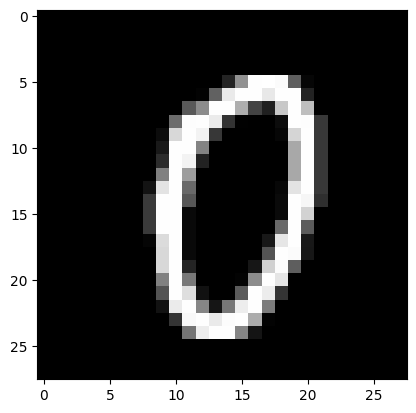

In [6]:
inx= 1000
img = train_features[inx]

print(train_labels[inx])

plt.gray()
plt.imshow(img)

# preprocessing

In [8]:
np.min(img), np.max(img)

(np.uint8(0), np.uint8(255))

In [9]:
train_features = train_features / 255.0
test_features = test_features / 255.0

# model defination

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [11]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])

In [38]:
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,848 (1.35 MB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,566 (924.09 KB)

In [39]:
hist = model.fit(train_features, train_labels, epochs=1000, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.5481e-07 - val_accuracy: 0.9804 - val_loss: 0.3092
Epoch 2/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.1482e-07 - val_accuracy: 0.9804 - val_loss: 0.3091
Epoch 3/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2123e-07 - val_accuracy: 0.9804 - val_loss: 0.3090
Epoch 4/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.7573e-08 - val_accuracy: 0.9804 - val_loss: 0.3089
Epoch 5/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.3490e-08 - val_accuracy: 0.9805 - val_loss: 0.3087
Epoch 6/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.0102e-07 - val_accuracy: 0.9806 - val_loss: 0.3087
Epoch 7/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.0041e-07 - val_accuracy: 0.9806 - val_loss: 0.3085
Epoch 8/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accura

# Predict

In [52]:
idx = 450
img = test_features[idx]
print(test_labels[idx])

3


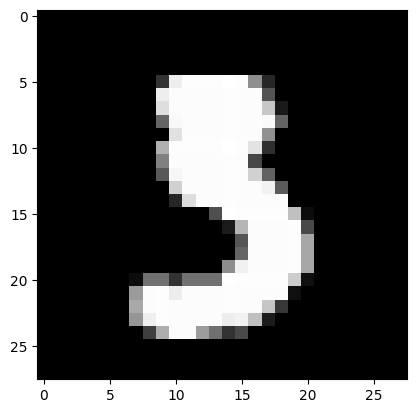

In [53]:
plt.gray()
plt.imshow(img)

In [54]:
test_data = np.reshape(img, (-1, 28, 28))
test_data.shape

(1, 28, 28)

In [55]:
model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 4.2791784e-17, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.1465286e-36]], dtype=float32)

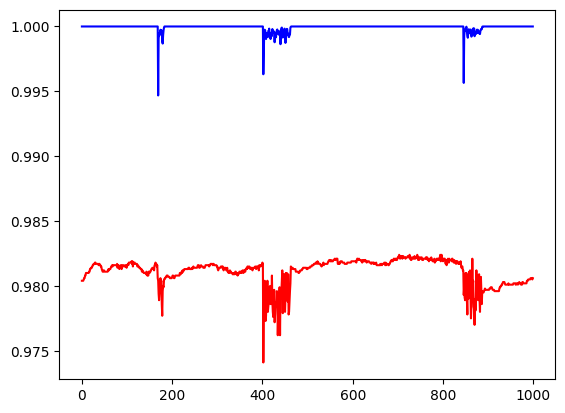

In [56]:
acc = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(acc, color='blue')
plt.plot(acc_val, color='red')